In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Optional: make plots display inside the notebook
%matplotlib inline

# For better visuals
sns.set(style="darkgrid")

In [8]:
# Load the dataset
df = pd.read_csv("C:/Users/monan/Downloads/owid-covid-data.csv")

# Display the first few rows
df.head()


,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,AFG,Asia,Afghanistan,2020-01-05,0.0,0.0,NaN,0.0,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772,NaN,NaN,NaN,NaN
1,AFG,Asia,Afghanistan,2020-01-06,0.0,0.0,NaN,0.0,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772,NaN,NaN,NaN,NaN
2,AFG,Asia,Afghanistan,2020-01-07,0.0,0.0,NaN,0.0,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772,NaN,NaN,NaN,NaN
3,AFG,Asia,Afghanistan,2020-01-08,0.0,0.0,NaN,0.0,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772,NaN,NaN,NaN,NaN
4,AFG,Asia,Afghanistan,2020-01-09,0.0,0.0,NaN,0.0,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772,NaN,NaN,NaN,NaN


In [9]:
# Show column names
print("Columns:\n", df.columns)

# Summary of missing values
print("\nMissing values:\n", df.isnull().sum())


Columns:
 Index(['iso_code', 'continent', 'location', 'date', 'total_cases', 'new_cases',
       'new_cases_smoothed', 'total_deaths', 'new_deaths',
       'new_deaths_smoothed', 'total_cases_per_million',
       'new_cases_per_million', 'new_cases_smoothed_per_million',
       'total_deaths_per_million', 'new_deaths_per_million',
       'new_deaths_smoothed_per_million', 'reproduction_rate', 'icu_patients',
       'icu_patients_per_million', 'hosp_patients',
       'hosp_patients_per_million', 'weekly_icu_admissions',
       'weekly_icu_admissions_per_million', 'weekly_hosp_admissions',
       'weekly_hosp_admissions_per_million', 'total_tests', 'new_tests',
       'total_tests_per_thousand', 'new_tests_per_thousand',
       'new_tests_smoothed', 'new_tests_smoothed_per_thousand',
       'positive_rate', 'tests_per_case', 'tests_units', 'total_vaccinations',
       'people_vaccinated', 'people_fully_vaccinated', 'total_boosters',
       'new_vaccinations', 'new_vaccinations_smoothed',

In [10]:
# STEP 1: Filter countries of interest
countries = ['Kenya', 'United States', 'India']
df = df[df['location'].isin(countries)]

In [11]:
# STEP 2: Drop rows with missing dates or critical values
# (Assuming 'date', 'total_cases', 'new_cases' are critical)
df = df.dropna(subset=['date', 'total_cases', 'new_cases'])

In [30]:
# STEP 3: Convert 'date' column to datetime
df['date'] = pd.to_datetime(df['date'])

In [12]:
# STEP 4: Handle missing numeric values
df = df.sort_values(['location', 'date'])  # Ensure order for interpolation
numeric_cols = df.select_dtypes(include='number').columns
df[numeric_cols] = df[numeric_cols].interpolate(method='linear')

In [13]:
# Confirm cleaning
print(df.info())
print(df.head())

<class 'pandas.core.frame.DataFrame'>
Index: 4580 entries, 173549 to 404682
Data columns (total 67 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   iso_code                                    4580 non-null   object 
 1   continent                                   4580 non-null   object 
 2   location                                    4580 non-null   object 
 3   date                                        4580 non-null   object 
 4   total_cases                                 4580 non-null   float64
 5   new_cases                                   4580 non-null   float64
 6   new_cases_smoothed                          4575 non-null   float64
 7   total_deaths                                4580 non-null   float64
 8   new_deaths                                  4580 non-null   float64
 9   new_deaths_smoothed                         4575 non-null   float64
 10  total_case

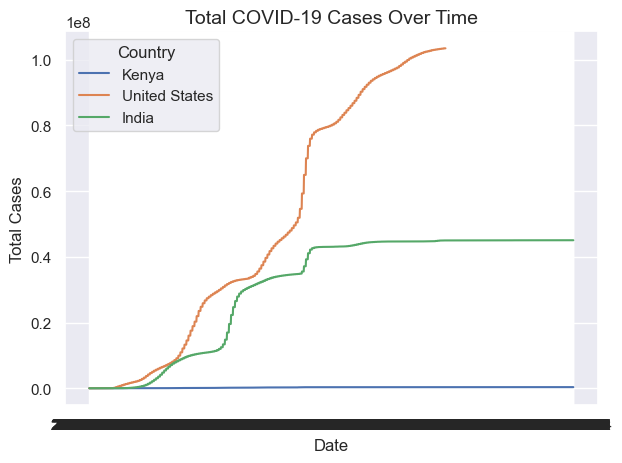

In [15]:
for country in ['Kenya', 'United States', 'India']:
    country_df = df[df['location'] == country]
    plt.plot(country_df['date'], country_df['total_cases'], label=country)

plt.title("Total COVID-19 Cases Over Time", fontsize=14)
plt.xlabel("Date")
plt.ylabel("Total Cases")
plt.legend(title="Country")
plt.tight_layout()
plt.show()



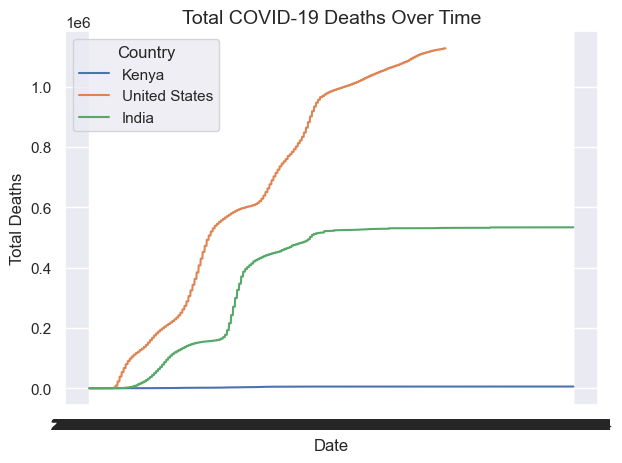

In [16]:
for country in ['Kenya', 'United States', 'India']:
    country_df = df[df['location'] == country]
    plt.plot(country_df['date'], country_df['total_deaths'], label=country)

plt.title("Total COVID-19 Deaths Over Time", fontsize=14)
plt.xlabel("Date")
plt.ylabel("Total Deaths")
plt.legend(title="Country")
plt.tight_layout()
plt.show()


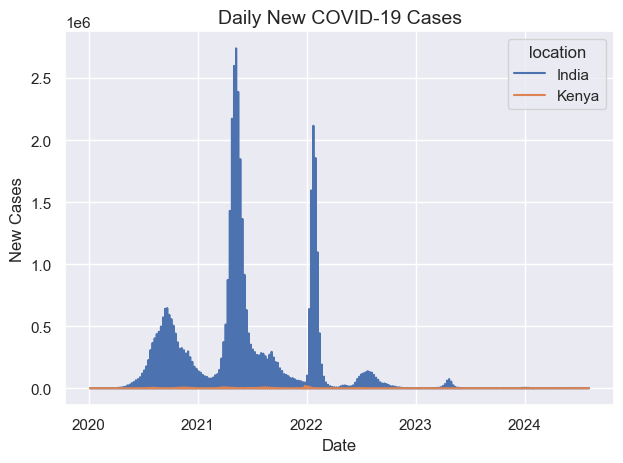

In [37]:
sns.lineplot(data=df, x='date', y='new_cases', hue='location')
plt.title("Daily New COVID-19 Cases", fontsize=14)
plt.xlabel("Date")
plt.ylabel("New Cases")
plt.tight_layout()
plt.show()


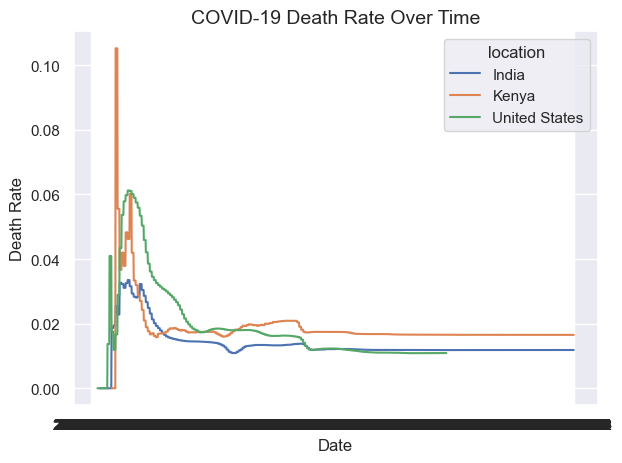

In [19]:
df['death_rate'] = df['total_deaths'] / df['total_cases']

sns.lineplot(data=df, x='date', y='death_rate', hue='location')
plt.title("COVID-19 Death Rate Over Time", fontsize=14)
plt.xlabel("Date")
plt.ylabel("Death Rate")
plt.tight_layout()
plt.show()


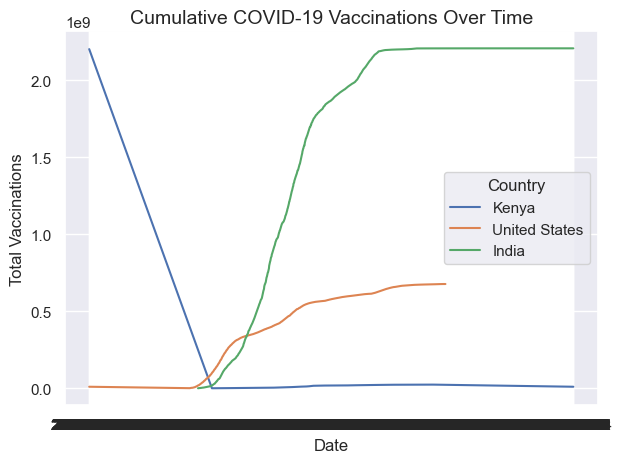

In [17]:
for country in ['Kenya', 'United States', 'India']:
    country_df = df[df['location'] == country]
    plt.plot(country_df['date'], country_df['total_vaccinations'], label=country)

plt.title("Cumulative COVID-19 Vaccinations Over Time", fontsize=14)
plt.xlabel("Date")
plt.ylabel("Total Vaccinations")
plt.legend(title="Country")
plt.tight_layout()
plt.show()


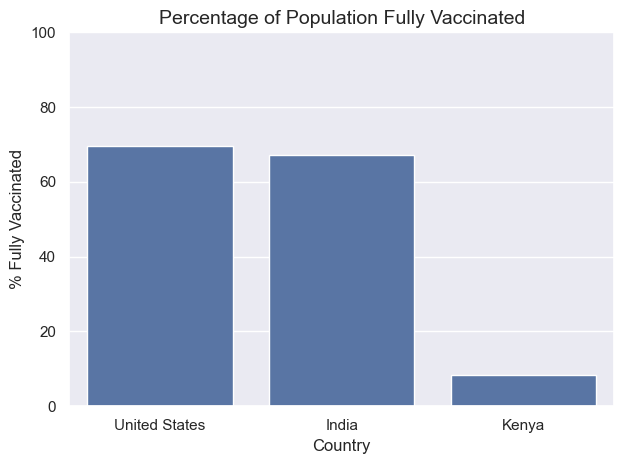

In [18]:
# Get the latest record per country
latest_vax = df.sort_values('date').groupby('location').tail(1)

# Bar plot
sns.barplot(data=latest_vax, x='location', y='people_fully_vaccinated_per_hundred')
plt.title("Percentage of Population Fully Vaccinated", fontsize=14)
plt.xlabel("Country")
plt.ylabel("% Fully Vaccinated")
plt.ylim(0, 100)
plt.tight_layout()
plt.show()


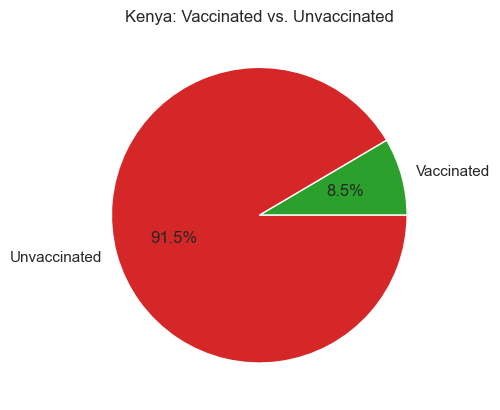

In [20]:
# Get Kenya's latest vaccination data
kenya_latest = latest_vax[latest_vax['location'] == 'Kenya'].iloc[0]
vaccinated = kenya_latest['people_fully_vaccinated']
population = kenya_latest['population']
unvaccinated = population - vaccinated

# Pie chart
plt.pie(
    [vaccinated, unvaccinated],
    labels=['Vaccinated', 'Unvaccinated'],
    autopct='%1.1f%%',
    colors=['#2ca02c', '#d62728']
)
plt.title("Kenya: Vaccinated vs. Unvaccinated")
plt.show()


In [ ]:
Insights from COVID-19 Data Analysis
India experienced the highest cumulative case count among the three countries analyzed
Daily new cases showed distinct waves, with synchronized peaks across countries during Delta and Omicron surges.
Kenya's waves were shorter and less intense, potentially due to testing/reporting limitations.

